Once you've trained a classification model and made predictions on your test set, you need appropriate metrics to quantify its performance. Accuracy alone is often insufficient, especially for imbalanced datasets. This section explores key classification metrics provided by `Scikit-learn`.

## Evaluation Metrics for Classification Models

This document covers:

* **Binary Classification Metrics:**
    * `accuracy_score`: Overall correctness.
    * `confusion_matrix` / `ConfusionMatrixDisplay`: Visualizing TP, TN, FP, FN.
    * `precision_score`: Accuracy of positive predictions.
    * `recall_score`: Ability to find all actual positives.
    * `f1_score`: Harmonic mean of precision and recall.
    * Specificity (TNR): Calculated from the confusion matrix.
    * `classification_report`: Text summary of precision, recall, F1 per class.
    * ROC Curve / AUC (`roc_curve`, `auc`, `roc_auc_score`): Evaluating performance across thresholds, ability to distinguish classes.
    * Precision-Recall Curve / Average Precision (`precision_recall_curve`, `average_precision_score`): Alternative to ROC, useful for imbalanced data.

* **Multi-Class Classification Metrics:**
    * Demonstrates Accuracy, Confusion Matrix, and Classification Report for multi-class problems.
    * Explains how `roc_auc_score` can be calculated for multi-class using One-vs-Rest (`ovr`) or One-vs-One (`ovo`) strategies, typically with `macro` or `weighted` averaging.

---

Choosing the right metric(s) depends heavily on the specific problem and the relative costs of different types of errors (e.g., is it worse to have a False Positive or a False Negative?).

--- Binary Classification Example ---

--- Evaluating Binary Classifier ---
a) Accuracy: 0.8100

b) Confusion Matrix:
 [[101  45]
 [ 12 142]]


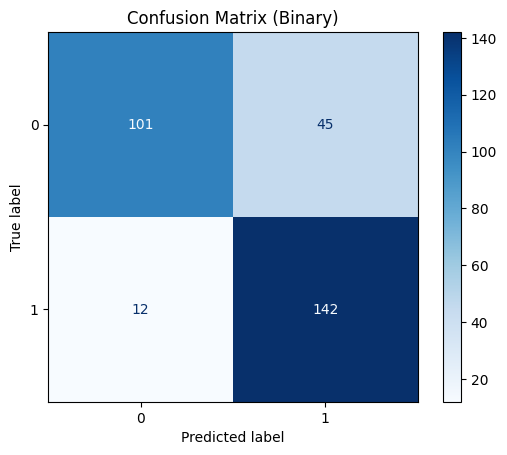

   True Negatives (TN): 101
   False Positives (FP): 45 (Type I Error)
   False Negatives (FN): 12 (Type II Error)
   True Positives (TP): 142

c) Precision: 0.7594
d) Recall (Sensitivity): 0.9221
e) F1-Score: 0.8328
f) Specificity (TNR): 0.6918

g) Classification Report:
               precision    recall  f1-score   support

     Class 0       0.89      0.69      0.78       146
     Class 1       0.76      0.92      0.83       154

    accuracy                           0.81       300
   macro avg       0.83      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300


h) ROC AUC: 0.8805


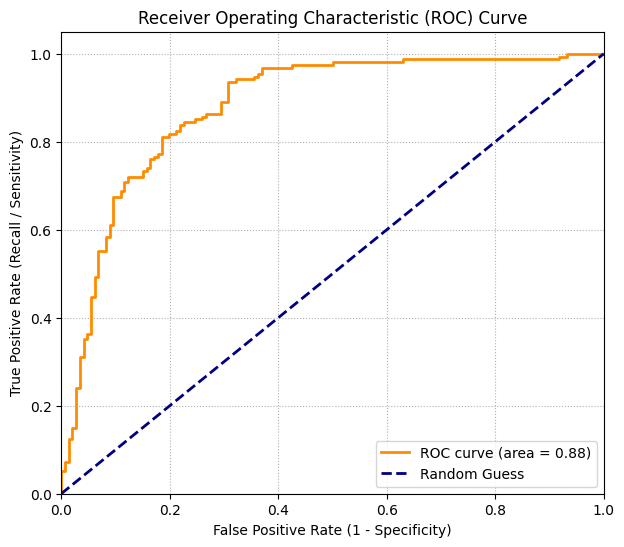


i) Average Precision (AP): 0.8582


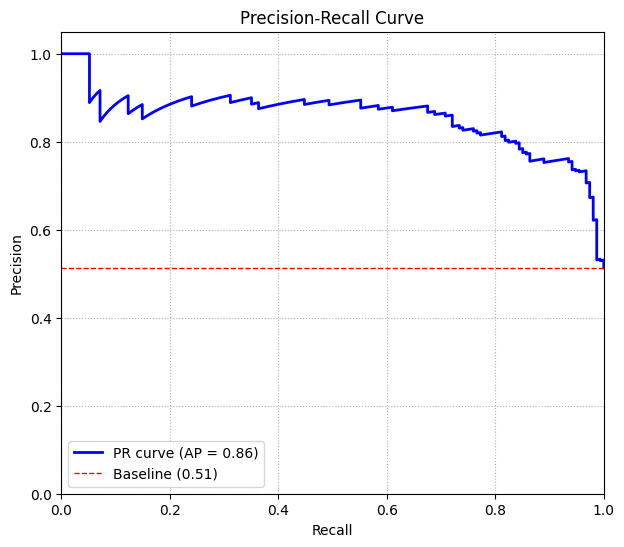

------------------------------


--- Multi-Class Classification Example ---

--- Evaluating Multi-Class Classifier ---
a) Accuracy: 0.9333

b) Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]


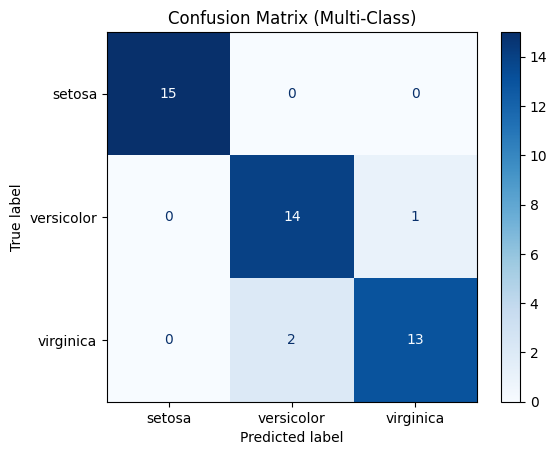


c) Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      0.93      0.90        15
   virginica       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.93      0.93      0.93        45


d) ROC AUC (Macro Avg - OvR): 0.9956
   ROC AUC (Macro Avg - OvO): 0.9956
------------------------------


In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.linear_model import LogisticRegression # Example classifier
from sklearn.svm import SVC # Another example classifier
# Metrics
from sklearn.metrics import (accuracy_score,
                             confusion_matrix, ConfusionMatrixDisplay,
                             precision_score, recall_score, f1_score,
                             classification_report,
                             roc_curve, auc, roc_auc_score,
                             precision_recall_curve, average_precision_score)

# --- 1. Binary Classification Example ---
# Create a synthetic binary classification dataset
print("--- Binary Classification Example ---")
X_bin, y_bin = make_classification(n_samples=1000, n_features=20,
                                   n_informative=10, n_redundant=5,
                                   n_classes=2, random_state=42, flip_y=0.1) # flip_y adds noise

# Split and scale data
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(
    X_bin, y_bin, test_size=0.3, random_state=42, stratify=y_bin)
scaler_bin = StandardScaler()
X_train_bin_sc = scaler_bin.fit_transform(X_train_bin)
X_test_bin_sc = scaler_bin.transform(X_test_bin)

# Train a simple model (Logistic Regression)
model_bin = LogisticRegression(solver='liblinear', random_state=42)
model_bin.fit(X_train_bin_sc, y_train_bin)

# Make predictions on the test set
y_pred_bin = model_bin.predict(X_test_bin_sc)
# Get probability estimates for the positive class (needed for ROC/PR curves)
# predict_proba returns probabilities for [class_0, class_1]
y_prob_bin = model_bin.predict_proba(X_test_bin_sc)[:, 1]

print("\n--- Evaluating Binary Classifier ---")

# a) Accuracy
# Proportion of correct predictions: (TP + TN) / Total
# Can be misleading on imbalanced datasets.
accuracy_bin = accuracy_score(y_test_bin, y_pred_bin)
print(f"a) Accuracy: {accuracy_bin:.4f}")

# b) Confusion Matrix
# Table showing TP, TN, FP, FN.
#   [[TN, FP],
#    [FN, TP]]
cm_bin = confusion_matrix(y_test_bin, y_pred_bin)
print("\nb) Confusion Matrix:\n", cm_bin)
# Visualize it
disp_cm_bin = ConfusionMatrixDisplay(confusion_matrix=cm_bin)
disp_cm_bin.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Binary)')
plt.show()
tn, fp, fn, tp = cm_bin.ravel()
print(f"   True Negatives (TN): {tn}")
print(f"   False Positives (FP): {fp} (Type I Error)")
print(f"   False Negatives (FN): {fn} (Type II Error)")
print(f"   True Positives (TP): {tp}")

# c) Precision
# How many of the positively predicted instances were actually positive? TP / (TP + FP)
# Measures the accuracy of positive predictions. High precision -> low FP rate.
precision_bin = precision_score(y_test_bin, y_pred_bin)
print(f"\nc) Precision: {precision_bin:.4f}")

# d) Recall (Sensitivity or True Positive Rate - TPR)
# How many of the actual positive instances did the model correctly identify? TP / (TP + FN)
# Measures the model's ability to find all positive samples. High recall -> low FN rate.
recall_bin = recall_score(y_test_bin, y_pred_bin)
print(f"d) Recall (Sensitivity): {recall_bin:.4f}")

# e) F1-Score
# Harmonic mean of Precision and Recall: 2 * (Precision * Recall) / (Precision + Recall)
# Provides a single score balancing both precision and recall. Useful when you need both.
f1_bin = f1_score(y_test_bin, y_pred_bin)
print(f"e) F1-Score: {f1_bin:.4f}")

# f) Specificity (True Negative Rate - TNR)
# How many of the actual negative instances did the model correctly identify? TN / (TN + FP)
# Not directly in classification_report, but calculable from CM: TN / (TN + FP)
specificity_bin = tn / (tn + fp)
print(f"f) Specificity (TNR): {specificity_bin:.4f}")

# g) Classification Report
# Provides a summary of precision, recall, f1-score for each class, plus support and averages.
print("\ng) Classification Report:\n", classification_report(y_test_bin, y_pred_bin, target_names=['Class 0', 'Class 1']))

# h) ROC Curve and AUC
# Receiver Operating Characteristic curve plots TPR vs. FPR (False Positive Rate = FP / (FP + TN))
# at various classification thresholds.
# AUC (Area Under the Curve) summarizes the curve into a single value (0.5=random, 1.0=perfect).
# Measures the model's ability to distinguish between classes across all thresholds.
fpr, tpr, thresholds_roc = roc_curve(y_test_bin, y_prob_bin)
roc_auc = auc(fpr, tpr)
# Or directly: roc_auc = roc_auc_score(y_test_bin, y_prob_bin)
print(f"\nh) ROC AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(7, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Recall / Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle=':')
plt.show()

# i) Precision-Recall Curve and Average Precision
# Plots Precision vs. Recall at various thresholds.
# More informative than ROC for highly imbalanced datasets, as it focuses on the minority (positive) class performance.
# Average Precision (AP) summarizes the PR curve (area under curve, approximately).
precision_pr, recall_pr, thresholds_pr = precision_recall_curve(y_test_bin, y_prob_bin)
ap_score = average_precision_score(y_test_bin, y_prob_bin)
print(f"\ni) Average Precision (AP): {ap_score:.4f}")

# Plot Precision-Recall Curve
plt.figure(figsize=(7, 6))
plt.plot(recall_pr, precision_pr, color='blue', lw=2, label=f'PR curve (AP = {ap_score:.2f})')
# Calculate baseline (proportion of positive class)
baseline = y_test_bin.sum() / len(y_test_bin)
plt.axhline(baseline, color='red', linestyle='--', lw=1, label=f'Baseline ({baseline:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, linestyle=':')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.show()
print("-" * 30)


# --- 2. Multi-Class Classification Example ---
# Using Iris dataset
print("\n\n--- Multi-Class Classification Example ---")
X_mc = load_iris().data
y_mc = load_iris().target
class_names_mc = load_iris().target_names

# Split and scale
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(
    X_mc, y_mc, test_size=0.3, random_state=42, stratify=y_mc)
scaler_mc = StandardScaler()
X_train_mc_sc = scaler_mc.fit_transform(X_train_mc)
X_test_mc_sc = scaler_mc.transform(X_test_mc)

# Train a model (SVC)
model_mc = SVC(kernel='rbf', probability=True, random_state=42) # probability=True needed for predict_proba
model_mc.fit(X_train_mc_sc, y_train_mc)

# Predictions
y_pred_mc = model_mc.predict(X_test_mc_sc)
y_prob_mc = model_mc.predict_proba(X_test_mc_sc)

print("\n--- Evaluating Multi-Class Classifier ---")

# a) Accuracy
accuracy_mc = accuracy_score(y_test_mc, y_pred_mc)
print(f"a) Accuracy: {accuracy_mc:.4f}")

# b) Confusion Matrix
cm_mc = confusion_matrix(y_test_mc, y_pred_mc)
print("\nb) Confusion Matrix:\n", cm_mc)
disp_cm_mc = ConfusionMatrixDisplay(confusion_matrix=cm_mc, display_labels=class_names_mc)
disp_cm_mc.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Multi-Class)')
plt.show()

# c) Classification Report (Precision, Recall, F1 per class + averages)
# 'macro': Calculate metrics for each label, and find their unweighted mean.
# 'weighted': Calculate metrics for each label, and find their average weighted by support (number of true instances for each label).
# 'micro': Calculate metrics globally by counting the total true positives, false negatives and false positives across all classes.
print("\nc) Classification Report:\n", classification_report(y_test_mc, y_pred_mc, target_names=class_names_mc))

# d) ROC AUC (One-vs-Rest or One-vs-One)
# Requires probabilities and label binarization for OvR.
# OvR (One-vs-Rest): Computes AUC for each class against all others.
# OvO (One-vs-One): Computes AUC for each pair of classes (computationally intensive for many classes).
try:
    roc_auc_mc_ovr = roc_auc_score(y_test_mc, y_prob_mc, multi_class='ovr', average='macro')
    roc_auc_mc_ovo = roc_auc_score(y_test_mc, y_prob_mc, multi_class='ovo', average='macro')
    print(f"\nd) ROC AUC (Macro Avg - OvR): {roc_auc_mc_ovr:.4f}")
    print(f"   ROC AUC (Macro Avg - OvO): {roc_auc_mc_ovo:.4f}")
    # Can also calculate weighted average: average='weighted'
except ValueError as e:
     print(f"\nCould not calculate multi-class ROC AUC: {e}") # Might happen if probabilities are not well-calibrated or only one class predicted

# Note: Plotting individual ROC curves for multi-class requires iterating through classes (see binary example logic).
print("-" * 30)